# ARIMA vs LSTM vs Prophet

Notebook ini merupakan terjemahan bahasa Indonesia dari penulis [Caner Dabakoglu](https://www.kaggle.com/cdabakoglu/time-series-forecasting-arima-lstm-prophet)

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

Dataset yang digunakan silakan didownload beserta file ini

In [2]:
df = pd.read_csv("monthly-beer-production-in-austr.csv")

In [3]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
df.Month = pd.to_datetime(df.Month)

In [6]:
df.head()

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [7]:
df = df.set_index("Month")

In [8]:
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [9]:
df.index.freq = 'MS'

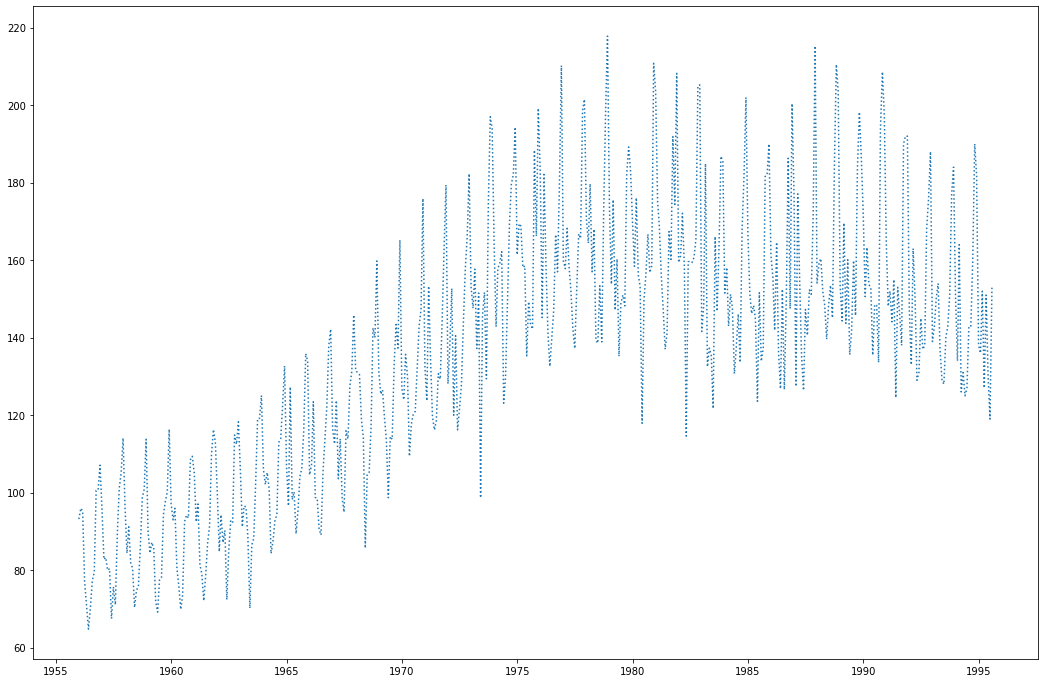

In [10]:
plt.figure(figsize=(18, 12))
plt.plot(df.index, df['Monthly beer production'], linestyle=':')
plt.xlabel=("Dates")
plt.ylabel=("Total Production")
plt.show()

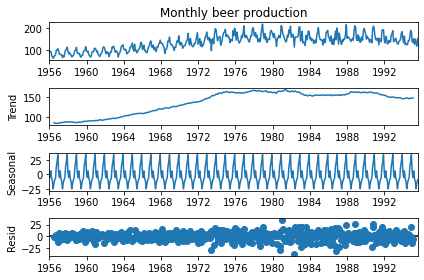

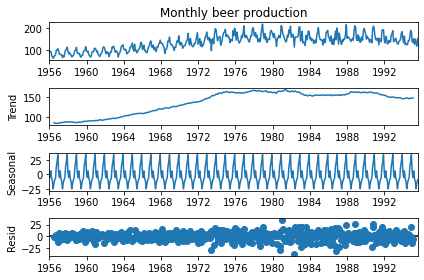

In [11]:
arima = seasonal_decompose(df['Monthly beer production'], model='add')
arima.plot()

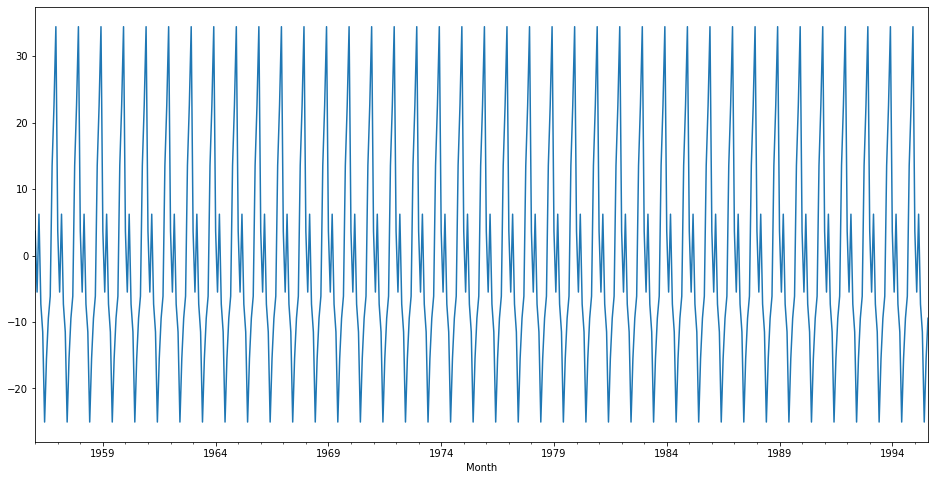

In [12]:
plt.figure(figsize=(16,8))
arima.seasonal.plot()

## ARIMA Forecast

In [13]:
!pip install pmdarima

In [14]:
from pmdarima.arima import auto_arima

### This is automatic process

In [15]:
auto_arima(df['Monthly beer production'], seasonal=True, m=12, max_p=7, max_d=5, max_q=7, max_P=4, max_D=4, max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(5, 1, 4)x(1, 0, [1], 12)   Log Likelihood               -1724.199
Date:                              Tue, 13 Jul 2021   AIC                           3472.398
Time:                                      11:35:34   BIC                           3522.358
Sample:                                           0   HQIC                          3492.045
                                              - 476                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2142      0.054     -3.970      0.000      -0.320      -0.108
ar.L2         -0.0976      0.058     -1.681      0.093      -0.211       0.016
ar.L3          0.7315      0.055     13.201      0.000       0.623       0.840
ar.L4         -0.1624      0.049     -3.327      0.001      -0.258      -0.067
ar.L5          0.0130      0.049      0.269      0.788      -0.082       0.108
ma.L1         -0.7497      0.035    -21.658      0.000      -0.818      -0.682
ma.L2         -0.1650      0.027     -6.074      0.000      -0.218      -0.112
ma.L3         -0.7948      0.026    -30.682      0.000      -0.846      -0.744
ma.L4          0.8586      0.031     27.885      0.000       0.798       0.919
ar.S.L12       0.9943      0.005    217.279      0.000       0.985       1.003
ma.S.L12      -0.8146      0.037    -21.910      0.000      -0.887      -0.742
sigma2        78.4266      4.196     18.689      0.000      70.202      86.651
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                70.85
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               2.94   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### This is manual process

In [16]:
df_train = df[:len(df)-12]
df_test = df[len(df)-12:] 

In [17]:
arima_model = SARIMAX(df_train['Monthly beer production'], order=(2,1,1), seasonal_order=(4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.969
Date:                                    Tue, 13 Jul 2021   AIC                           3437.938
Time:                                            11:37:09   BIC                           3483.453
Sample:                                        01-01-1956   HQIC                          3455.856
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1172      0.035     -3.345      0.001      -0.186      -0.049
ar.L2         -0.1673      0.047     -3.576      0.000      -0.259      -0.076
ma.L1         -0.8457      0.027    -30.847      0.000      -0.899      -0.792
ar.S.L12       1.7576      0.121     14.544      0.000       1.521       1.995
ar.S.L24      -1.6137      0.233     -6.931      0.000      -2.070      -1.157
ar.S.L36       0.7935      0.184      4.306      0.000       0.432       1.155
ar.S.L48       0.0612      0.067      0.909      0.364      -0.071       0.193
ma.S.L12      -1.5565      0.130    -11.973      0.000      -1.811      -1.302
ma.S.L24       1.3902      0.216      6.437      0.000       0.967       1.814
ma.S.L36      -0.6637      0.125     -5.306      0.000      -0.909      -0.419
sigma2        85.1704      4.979     17.106      0.000      75.412      94.929
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                40.57
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               4.06   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
arima_pred = arima_result.predict(start = len(df_train), end = len(df)-1, typ='levels').rename("ARIMA Predictions")
arima_pred

1994-09-01    134.241516
1994-10-01    157.620190
1994-11-01    181.593237
1994-12-01    183.646905
1995-01-01    145.052873
1995-02-01    137.066758
1995-03-01    151.360742
1995-04-01    133.289272
1995-05-01    137.980286
1995-06-01    120.671092
1995-07-01    128.454060
1995-08-01    138.979393
Freq: MS, Name: ARIMA Predictions, dtype: float64

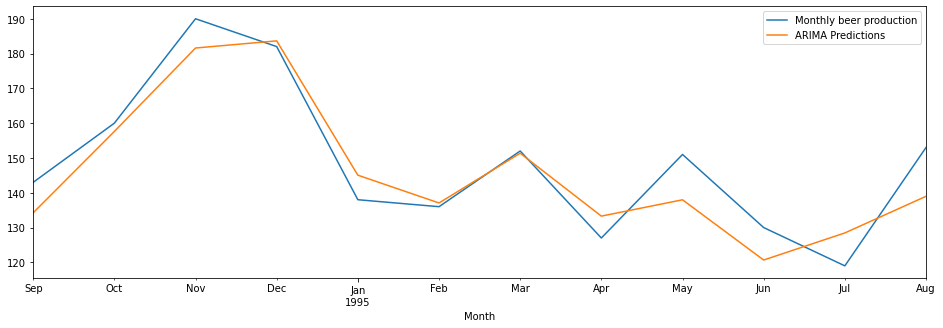

In [19]:
df_test['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend=True)

In [20]:
arima_rmse_error = rmse(df_test['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error ** 2
mean_value = df['Monthly beer production'].mean()

print(f"MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}")

MSE Error: 65.75860371663133
RMSE Error: 8.109167880654052
Mean: 136.39537815126045


In [22]:
df_test['ARIMA_Predictions'] = arima_pred

## LSTM Forecast

In [23]:
df_train = df[:len(df)-12]
df_test = df[len(df)-12:] 

In [24]:
df_test

,Monthly beer production
Month,
1994-09-01,143.0
1994-10-01,160.0
1994-11-01,190.0
1994-12-01,182.0
1995-01-01,138.0
1995-02-01,136.0
1995-03-01,152.0
1995-04-01,127.0
1995-05-01,151.0


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
scaler.fit(df_train)
scaled_df_train = scaler.transform(df_train)
scaled_df_test = scaler.transform(df_test)

Untuk membuat model LSTM, perlu dibuatkan Time Series Generator Object terlebih dahulu

In [28]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_df_train, scaled_df_train, length=n_input, batch_size=1) # Penggunaan scaled_df_train 
                                                                                                # 2x karena sebagai input output

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [31]:
lstm_model.fit_generator(generator, epochs=20)

Epoch 1/20
452/452 [==============================] - 29s 19ms/step - loss: 0.0374
Epoch 2/20
452/452 [==============================] - 9s 20ms/step - loss: 0.0151
Epoch 3/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0094
Epoch 4/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0078
Epoch 5/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0078
Epoch 6/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0069
Epoch 7/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0069
Epoch 8/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0067
Epoch 9/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0073
Epoch 10/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0068
Epoch 11/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0076
Epoch 12/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0059
Epoch 13/20


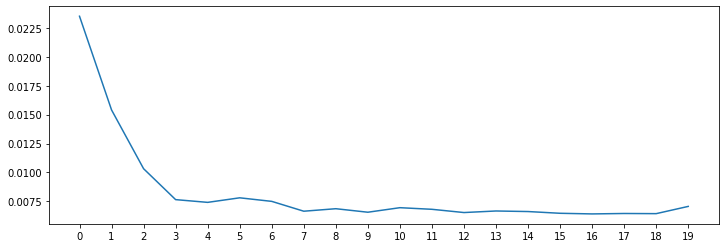

In [32]:
lossess_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(lossess_lstm)), lossess_lstm)

In [33]:
lstm_predictions_scaled = list()

batch = scaled_df_train[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(df_test)):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:,1:,:], [[lstm_pred]], axis=1)

In [34]:
lstm_predictions_scaled

[array([0.5067189], dtype=float32),
 array([0.5845202], dtype=float32),
 array([0.6966861], dtype=float32),
 array([0.691428], dtype=float32),
 array([0.53266394], dtype=float32),
 array([0.5093061], dtype=float32),
 array([0.56140625], dtype=float32),
 array([0.4291637], dtype=float32),
 array([0.42825928], dtype=float32),
 array([0.40902573], dtype=float32),
 array([0.43324688], dtype=float32),
 array([0.48537606], dtype=float32)]

In [35]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [36]:
lstm_predictions

array([[142.32798772],
       [154.23159378],
       [171.39297162],
       [170.58848487],
       [146.29758303],
       [142.7238292 ],
       [150.69515698],
       [130.46204524],
       [130.32367035],
       [127.38093649],
       [131.08677276],
       [139.06253718]])

In [37]:
df_test['LSTM_Predictions'] = lstm_predictions

In [39]:
df_test

,Monthly beer production,LSTM_Predictions
Month,,
1994-09-01,143.0,142.327988
1994-10-01,160.0,154.231594
1994-11-01,190.0,171.392972
1994-12-01,182.0,170.588485
1995-01-01,138.0,146.297583
1995-02-01,136.0,142.723829
1995-03-01,152.0,150.695157
1995-04-01,127.0,130.462045
1995-05-01,151.0,130.323670


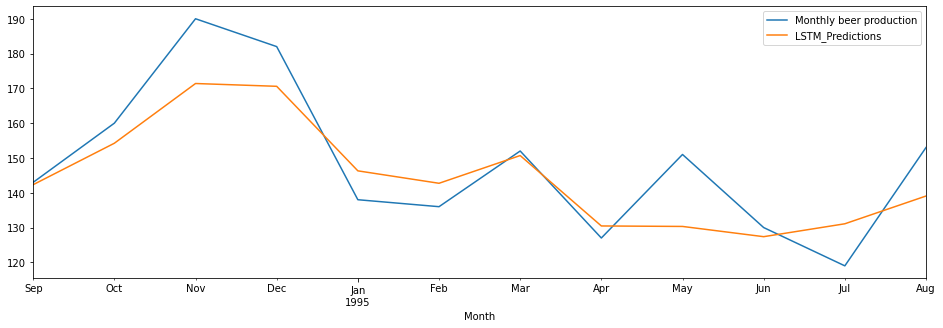

In [40]:
df_test['Monthly beer production'].plot(figsize=(16,5), legend=True)
df_test['LSTM_Predictions'].plot(legend=True)

In [41]:
lstm_rmse_error = rmse(df_test['Monthly beer production'], df_test['LSTM_Predictions'])
lstm_mse_error = lstm_rmse_error ** 2
mean_value = df['Monthly beer production'].mean()

print(f"MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}")

MSE Error: 117.71928969944214
RMSE Error: 10.849852058873529
Mean: 136.39537815126045


## Prophet Forecast

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [43]:
df_prophet = df.copy()
df_prophet = df.reset_index()

In [44]:
df_prophet.columns = ['ds', 'y']

In [45]:
df_train_prophet = df_prophet.iloc[:len(df)-12]
df_test_prophet = df_prophet.iloc[len(df)-12:]

In [46]:
from fbprophet import Prophet

In [47]:
prophet_model = Prophet()
prophet_model.fit(df_train_prophet)
future = prophet_model.make_future_dataframe(periods=12, freq='MS')
prophet_pred = prophet_model.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.043859,130.222606,155.662885,150.982654,151.095082,-7.957704,-7.957704,-7.957704,-7.957704,-7.957704,-7.957704,0.0,0.0,0.0,143.086155
472,1995-05-01,150.979616,126.390371,152.054252,150.891150,151.049214,-11.394498,-11.394498,-11.394498,-11.394498,-11.394498,-11.394498,0.0,0.0,0.0,139.585118
473,1995-06-01,150.913231,114.399452,138.943973,150.799834,151.005945,-23.904571,-23.904571,-23.904571,-23.904571,-23.904571,-23.904571,0.0,0.0,0.0,127.008661
474,1995-07-01,150.848988,122.496906,148.346292,150.711584,150.969527,-15.751614,-15.751614,-15.751614,-15.751614,-15.751614,-15.751614,0.0,0.0,0.0,135.097374
475,1995-08-01,150.782603,129.881851,152.785988,150.614427,150.926829,-9.209502,-9.209502,-9.209502,-9.209502,-9.209502,-9.209502,0.0,0.0,0.0,141.573101


In [49]:
prophet_pred = pd.DataFrame({"Date": prophet_pred[-12:]['ds'], 'Pred' : prophet_pred[-12:]['yhat']})

In [50]:
prophet_pred = prophet_pred.set_index('Date')

In [51]:
prophet_pred.index.freq = "MS"

In [52]:
prophet_pred

,Pred
Date,
1994-09-01,144.980217
1994-10-01,166.012222
1994-11-01,173.629620
1994-12-01,185.881744
1995-01-01,155.163406
1995-02-01,146.732442
1995-03-01,158.844417
1995-04-01,143.086155
1995-05-01,139.585118


In [53]:
df_test['Prophet_Predictions'] = prophet_pred['Pred'].values

In [54]:
import seaborn as sns

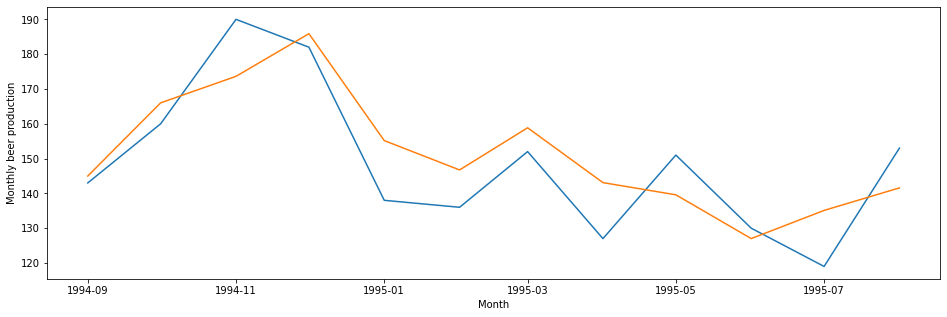

In [55]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x=df_test.index, y=df_test['Monthly beer production'])
sns.lineplot(x=df_test.index, y = df_test['Prophet_Predictions'])

In [56]:
prophet_rmse_error = rmse(df_test['Monthly beer production'], df_test['Prophet_Predictions'])
prophet_mse_error = prophet_rmse_error ** 2
mean_value = df['Monthly beer production'].mean()

print(f"MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}")

MSE Error: 130.62088996007174
RMSE Error: 11.428949643780557
Mean: 136.39537815126045


In [57]:
df_test['ARIMA_Predictions'] = arima_pred

In [58]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models":["ARIMA", "LSTM", "Prophet"], "RMSE Errors": rmse_errors, "MSE Errors": mse_errors})

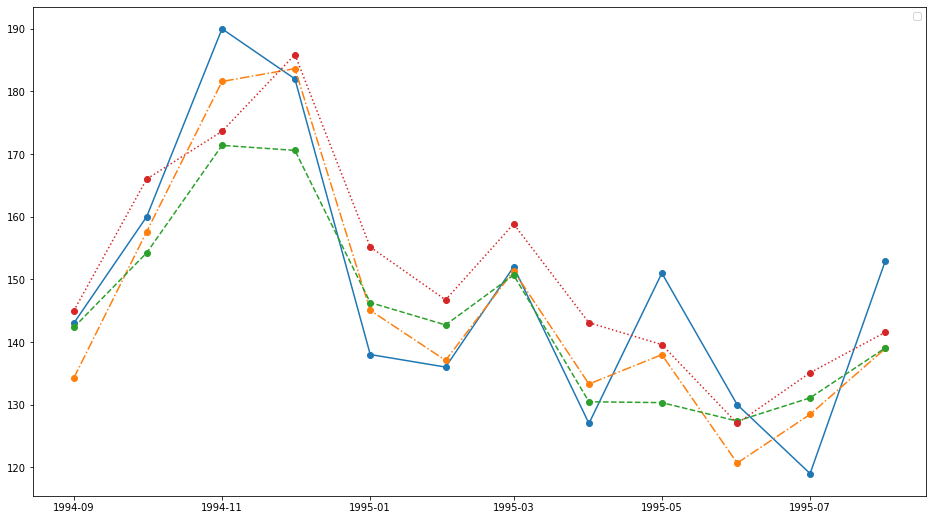

In [59]:
plt.figure(figsize=(16,9))
plt.plot_date(df_test.index, df_test['Monthly beer production'], linestyle="-")
plt.plot_date(df_test.index, df_test['ARIMA_Predictions'], linestyle="-.")
plt.plot_date(df_test.index, df_test['LSTM_Predictions'], linestyle="--")
plt.plot_date(df_test.index, df_test['Prophet_Predictions'], linestyle=":")
plt.legend()
plt.show()

In [60]:
print(f"Mean: {df_test['Monthly beer production'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.109168,65.758604
1,LSTM,10.849852,117.719290
2,Prophet,11.428950,130.620890


In [61]:
df_test

,Monthly beer production,LSTM_Predictions,Prophet_Predictions,ARIMA_Predictions
Month,,,,
1994-09-01,143.0,142.327988,144.980217,134.241516
1994-10-01,160.0,154.231594,166.012222,157.620190
1994-11-01,190.0,171.392972,173.629620,181.593237
1994-12-01,182.0,170.588485,185.881744,183.646905
1995-01-01,138.0,146.297583,155.163406,145.052873
1995-02-01,136.0,142.723829,146.732442,137.066758
1995-03-01,152.0,150.695157,158.844417,151.360742
1995-04-01,127.0,130.462045,143.086155,133.289272
1995-05-01,151.0,130.323670,139.585118,137.980286
